Proyecto Verificar la salud de las plantas de tomate usando CNN 

In [3]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import tensorflow as tf
import random
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
#from tensorflow.keras.applications.inception_v3 import InceptionV3

Importamos el dataset y lo ponemos de tamaño 225x225 las imagenes

In [65]:
img_size = [225, 225]
inception = InceptionV3(input_shape=img_size + [3], weights='imagenet', include_top=False)

In [66]:
for layer in inception.layers:
    layer.trainable = False

In [67]:
folder = glob('dataset/train/*')
folder

['dataset/train\\Bacterial_spot',
 'dataset/train\\Early_blight',
 'dataset/train\\healthy',
 'dataset/train\\Late_blight',
 'dataset/train\\Leaf_Mold',
 'dataset/train\\Septoria_leaf_spot',
 'dataset/train\\Spider_mites Two-spotted_spider_mite',
 'dataset/train\\Target_Spot',
 'dataset/train\\Tomato_mosaic_virus',
 'dataset/train\\Tomato_Yellow_Leaf_Curl_Virus']

In [68]:
x = Flatten()(inception.output)
prediction = Dense(len(folder), activation='softmax')(x)

In [69]:
modelo = Model(inputs=inception.input, outputs=prediction)
#modelo.summary()


In [74]:
modelo.compile(
  loss='categorical_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)


In [71]:


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [72]:
#training y testing
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (225, 225),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/train',
                                            target_size = (225, 225),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [76]:
result = modelo.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/10
313/313 [==============================] - 338s 1s/step - loss: 4.3488 - accuracy: 0.7123 - val_loss: 1.7461 - val_accuracy: 0.8211
Epoch 2/10
313/313 [==============================] - 334s 1s/step - loss: 3.1039 - accuracy: 0.7653 - val_loss: 2.1644 - val_accuracy: 0.7954
Epoch 3/10
313/313 [==============================] - 341s 1s/step - loss: 2.4737 - accuracy: 0.7984 - val_loss: 3.7059 - val_accuracy: 0.7412
Epoch 4/10
313/313 [==============================] - 363s 1s/step - loss: 1.9447 - accuracy: 0.8210 - val_loss: 1.6361 - val_accuracy: 0.8235
Epoch 5/10
313/313 [==============================] - 366s 1s/step - loss: 1.8191 - accuracy: 0.8289 - val_loss: 1.1010 - val_accuracy: 0.8692
Epoch 6/10
313/313 [==============================] - 351s 1s/step - loss: 1.7202 - accuracy: 0.8395 - val_loss: 2.6790 - val_accuracy: 0.7800
Epoch 7/10
313/313 [==============================] - 338s 1s/step - loss: 1.4625 - accuracy: 0.8534 - val_loss: 1.9677 - val_accuracy: 0.8195

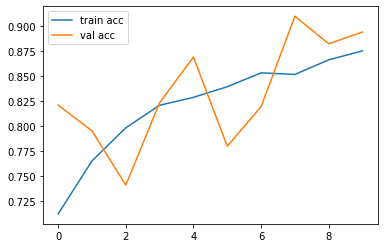

<Figure size 432x288 with 0 Axes>

In [78]:
# Precision
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()